In [1]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Activation
import pandas_datareader.data as pdr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
plt.style.use('fivethirtyeight')
from keras.models import load_model
#model = load_model('ES_stock_model.h5')

In [2]:
data = pdr.DataReader('ES=F', 'yahoo', start='1970-01-01', end='2022-07-08')
vix_data = pdr.DataReader('^VIX', 'yahoo', start='1970-01-01', end='2022-07-08')
data.to_csv('ES_stock.csv')
vix_data.to_csv('vix_data.csv')
df = pd.read_csv('ES_stock.csv')
df1 = pd.read_csv('vix_data.csv')
df1

,Date,High,Low,Open,Close,Volume,Adj Close
0,1990-01-02,17.240000,17.240000,17.240000,17.240000,0,17.240000
1,1990-01-03,18.190001,18.190001,18.190001,18.190001,0,18.190001
2,1990-01-04,19.219999,19.219999,19.219999,19.219999,0,19.219999
3,1990-01-05,20.110001,20.110001,20.110001,20.110001,0,20.110001
4,1990-01-08,20.260000,20.260000,20.260000,20.260000,0,20.260000
...,...,...,...,...,...,...,...
8169,2022-06-03,25.959999,24.760000,24.910000,24.790001,0,24.790001
8170,2022-06-06,25.809999,24.820000,25.370001,25.070000,0,25.070000
8171,2022-06-07,26.240000,23.879999,25.540001,24.020000,0,24.020000
8172,2022-06-08,24.780001,23.740000,24.370001,23.959999,0,23.959999


In [3]:
date = df['Date'].tolist()
date1 = df1['Date'].tolist()
date2 = [i for i in date if i in date1]
date = [i for i in date2 if i in date]
print(len(df1))

8174


In [4]:
li = []
for i in date1:
    if i in date:
        li.append(True)
    else:
        li.append(False)
print(len(li))

8174


In [5]:
df1['choice'] = li
df1

,Date,High,Low,Open,Close,Volume,Adj Close,choice
0,1990-01-02,17.240000,17.240000,17.240000,17.240000,0,17.240000,False
1,1990-01-03,18.190001,18.190001,18.190001,18.190001,0,18.190001,False
2,1990-01-04,19.219999,19.219999,19.219999,19.219999,0,19.219999,False
3,1990-01-05,20.110001,20.110001,20.110001,20.110001,0,20.110001,False
4,1990-01-08,20.260000,20.260000,20.260000,20.260000,0,20.260000,False
...,...,...,...,...,...,...,...,...
8169,2022-06-03,25.959999,24.760000,24.910000,24.790001,0,24.790001,True
8170,2022-06-06,25.809999,24.820000,25.370001,25.070000,0,25.070000,True
8171,2022-06-07,26.240000,23.879999,25.540001,24.020000,0,24.020000,True
8172,2022-06-08,24.780001,23.740000,24.370001,23.959999,0,23.959999,True


In [6]:
df2 = df1.loc[df1['choice'] == True]
df2

,Date,High,Low,Open,Close,Volume,Adj Close,choice
2707,2000-09-18,20.350000,18.780001,18.879999,20.250000,0,20.250000,True
2708,2000-09-19,20.250000,19.540001,20.219999,19.540001,0,19.540001,True
2709,2000-09-20,21.180000,19.920000,19.990000,19.930000,0,19.930000,True
2710,2000-09-21,20.709999,20.010000,20.170000,20.180000,0,20.180000,True
2711,2000-09-22,22.660000,20.740000,22.090000,20.740000,0,20.740000,True
...,...,...,...,...,...,...,...,...
8169,2022-06-03,25.959999,24.760000,24.910000,24.790001,0,24.790001,True
8170,2022-06-06,25.809999,24.820000,25.370001,25.070000,0,25.070000,True
8171,2022-06-07,26.240000,23.879999,25.540001,24.020000,0,24.020000,True
8172,2022-06-08,24.780001,23.740000,24.370001,23.959999,0,23.959999,True


In [7]:
date_df2 = df2['Date'].tolist()
date_df = df['Date'].tolist()
li2 = []
for i in date_df:
    if i in date_df2:
        li2.append(True)
    else:
        li2.append(False)
len(li2)

5491

In [8]:
df['choice'] = li2

In [9]:
df3 = df.loc[df['choice'] == True]
df3

,Date,High,Low,Open,Close,Volume,Adj Close,choice
0,2000-09-18,1489.75,1462.25,1485.25,1467.50,104794.0,1467.50,True
1,2000-09-19,1482.75,1466.75,1467.00,1478.50,103371.0,1478.50,True
2,2000-09-20,1480.50,1450.25,1478.75,1469.50,109667.0,1469.50,True
3,2000-09-21,1474.00,1455.50,1470.25,1469.50,98528.0,1469.50,True
4,2000-09-22,1471.00,1436.75,1454.75,1468.50,97416.0,1468.50,True
...,...,...,...,...,...,...,...,...
5486,2022-06-03,4189.00,4096.75,4177.75,4107.00,1532766.0,4107.00,True
5487,2022-06-06,4168.25,4104.50,4110.50,4120.50,1457918.0,4120.50,True
5488,2022-06-07,4164.00,4076.00,4122.00,4158.75,1677883.0,4158.75,True
5489,2022-06-08,4160.00,4105.25,4150.75,4114.00,1677883.0,4114.00,True


In [10]:
dataframe = df3.drop(['choice', 'Adj Close'], axis=1)
dataframe

,Date,High,Low,Open,Close,Volume
0,2000-09-18,1489.75,1462.25,1485.25,1467.50,104794.0
1,2000-09-19,1482.75,1466.75,1467.00,1478.50,103371.0
2,2000-09-20,1480.50,1450.25,1478.75,1469.50,109667.0
3,2000-09-21,1474.00,1455.50,1470.25,1469.50,98528.0
4,2000-09-22,1471.00,1436.75,1454.75,1468.50,97416.0
...,...,...,...,...,...,...
5486,2022-06-03,4189.00,4096.75,4177.75,4107.00,1532766.0
5487,2022-06-06,4168.25,4104.50,4110.50,4120.50,1457918.0
5488,2022-06-07,4164.00,4076.00,4122.00,4158.75,1677883.0
5489,2022-06-08,4160.00,4105.25,4150.75,4114.00,1677883.0


In [11]:
l = df2['Open'].tolist()
l1 = df2['High'].tolist()
l2 = df2['Low'].tolist()
l3 = df2['Close'].tolist()
len(l)

5465

In [12]:
dataframe['es_open'] = l
dataframe['es_high'] = l1
dataframe['es_low'] = l2
dataframe['es_close'] = l3
dataframe

,Date,High,Low,Open,Close,Volume,es_open,es_high,es_low,es_close
0,2000-09-18,1489.75,1462.25,1485.25,1467.50,104794.0,18.879999,20.350000,18.780001,20.250000
1,2000-09-19,1482.75,1466.75,1467.00,1478.50,103371.0,20.219999,20.250000,19.540001,19.540001
2,2000-09-20,1480.50,1450.25,1478.75,1469.50,109667.0,19.990000,21.180000,19.920000,19.930000
3,2000-09-21,1474.00,1455.50,1470.25,1469.50,98528.0,20.170000,20.709999,20.010000,20.180000
4,2000-09-22,1471.00,1436.75,1454.75,1468.50,97416.0,22.090000,22.660000,20.740000,20.740000
...,...,...,...,...,...,...,...,...,...,...
5486,2022-06-03,4189.00,4096.75,4177.75,4107.00,1532766.0,24.910000,25.959999,24.760000,24.790001
5487,2022-06-06,4168.25,4104.50,4110.50,4120.50,1457918.0,25.370001,25.809999,24.820000,25.070000
5488,2022-06-07,4164.00,4076.00,4122.00,4158.75,1677883.0,25.540001,26.240000,23.879999,24.020000
5489,2022-06-08,4160.00,4105.25,4150.75,4114.00,1677883.0,24.370001,24.780001,23.740000,23.959999


In [13]:
a = dataframe['Date'].tolist()
def week_day(year, month, day):
    offset = [0, 31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334]
    week   = ['Sunday', 
              'Monday', 
              'Tuesday', 
              'Wednesday', 
              'Thursday',  
              'Friday', 
              'Saturday']
    afterFeb = 1
    if month > 2: afterFeb = 0
    aux = year - 1700 - afterFeb
    # dayOfWeek for 1700/1/1 = 5, Friday
    dayOfWeek  = 5
    # partial sum of days betweem current date and 1700/1/1
    dayOfWeek += (aux + afterFeb) * 365                  
    # leap year correction    
    dayOfWeek += aux / 4 - aux / 100 + (aux + 100) / 400     
    # sum monthly and day offsets
    dayOfWeek += offset[month - 1] + (day - 1)               
    dayOfWeek %= 7
    return int(dayOfWeek)
day_of_the_week = []
month = []
day = []
for i in a:
    i = i.split('-')
    dow = week_day(int(i[0]), int(i[1]), int(i[2]))
    day_of_the_week.append(dow)
    month.append(int(i[1]))
    day.append(int(i[2]))   

In [14]:
dataframe['DoW'] = day_of_the_week
dataframe['month'] = month
dataframe['day'] = day

In [15]:
#df = pd.read_csv('ES_stock.csv')
#dataframe1 = dataframe[['Date', 'Open', 'High', 'Low', 'Close', 'Volume', '']]
dataframe.set_index("Date", inplace = True)
len_train = round(len(dataframe) * .8)
len_test = len(dataframe) - len_train

train_data = dataframe.tail(len_train)
test_data = dataframe.head(len_test)
print(len(train_data), len(test_data))

4372 1093


In [16]:
dataframe.head()

,High,Low,Open,Close,Volume,es_open,es_high,es_low,es_close,DoW,month,day
Date,,,,,,,,,,,,
2000-09-18,1489.75,1462.25,1485.25,1467.5,104794.0,18.879999,20.350000,18.780001,20.250000,1,9,18
2000-09-19,1482.75,1466.75,1467.00,1478.5,103371.0,20.219999,20.250000,19.540001,19.540001,2,9,19
2000-09-20,1480.50,1450.25,1478.75,1469.5,109667.0,19.990000,21.180000,19.920000,19.930000,3,9,20
2000-09-21,1474.00,1455.50,1470.25,1469.5,98528.0,20.170000,20.709999,20.010000,20.180000,4,9,21
2000-09-22,1471.00,1436.75,1454.75,1468.5,97416.0,22.090000,22.660000,20.740000,20.740000,5,9,22


In [17]:
# days = train_data['Date'].tolist()
dataset = train_data.loc[:, ['Open', 'High', 'Low', 'Close', 'Volume', 'es_open', 'es_high', 'es_low', 'es_close', 'DoW', 'month', 'day']]

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
dataset

,Open,High,Low,Close,Volume,es_open,es_high,es_low,es_close,DoW,month,day
Date,,,,,,,,,,,,
2005-01-26,1169.75,1176.75,1169.50,1173.25,751462.0,13.840000,13.840000,13.060000,13.440000,2,1,26
2005-01-27,1173.00,1178.00,1170.25,1174.75,732660.0,13.500000,13.570000,12.960000,13.240000,3,1,27
2005-01-28,1175.25,1177.50,1166.25,1174.75,829911.0,13.150000,13.560000,12.830000,13.240000,4,1,28
2005-01-31,1176.75,1183.00,1176.75,1181.75,669875.0,13.630000,13.630000,12.790000,12.820000,0,1,31
2005-02-01,1181.25,1191.00,1179.50,1189.25,651757.0,12.800000,13.020000,12.020000,12.030000,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-03,4177.75,4189.00,4096.75,4107.00,1532766.0,24.910000,25.959999,24.760000,24.790001,5,6,3
2022-06-06,4110.50,4168.25,4104.50,4120.50,1457918.0,25.370001,25.809999,24.820000,25.070000,1,6,6
2022-06-07,4122.00,4164.00,4076.00,4158.75,1677883.0,25.540001,26.240000,23.879999,24.020000,2,6,7


In [18]:
X_train = []
y_train = []

for i in range(100, len(train_data)):
    X_train.append(scaled_data[i-100:i, :])
    y_train.append(scaled_data[i, :])

In [19]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [20]:
model = Sequential()
model.add(LSTM(128, activation='relu', return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(25))
model.add(Dense(dataframe.shape[1]))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [21]:
model.fit(X_train, y_train, batch_size=24, epochs=100)

Epoch 1/100
178/178 [==============================] - 11s 54ms/step - loss: 0.0301 - accuracy: 0.4218
Epoch 2/100
178/178 [==============================] - 9s 52ms/step - loss: 0.0155 - accuracy: 0.5262
Epoch 3/100
178/178 [==============================] - 9s 51ms/step - loss: 0.0136 - accuracy: 0.5578
Epoch 4/100
178/178 [==============================] - 10s 56ms/step - loss: 0.0130 - accuracy: 0.5660
Epoch 5/100
178/178 [==============================] - 9s 52ms/step - loss: 0.0120 - accuracy: 0.5908
Epoch 6/100
178/178 [==============================] - 9s 51ms/step - loss: 0.0115 - accuracy: 0.5866
Epoch 7/100
178/178 [==============================] - 10s 53ms/step - loss: 0.0106 - accuracy: 0.6138
Epoch 8/100
178/178 [==============================] - 9s 53ms/step - loss: 0.0091 - accuracy: 0.6294
Epoch 9/100
178/178 [==============================] - 9s 53ms/step - loss: 0.0078 - accuracy: 0.6697
Epoch 10/100
178/178 [==============================] - 9s 51ms/step - loss: 0.

178/178 [==============================] - 9s 52ms/step - loss: 0.0035 - accuracy: 0.7992
Epoch 81/100
178/178 [==============================] - 11s 59ms/step - loss: 0.0037 - accuracy: 0.7924
Epoch 82/100
178/178 [==============================] - 17s 96ms/step - loss: 0.0038 - accuracy: 0.7926
Epoch 83/100
178/178 [==============================] - 17s 95ms/step - loss: 0.0036 - accuracy: 0.8078
Epoch 84/100
178/178 [==============================] - 17s 95ms/step - loss: 0.0037 - accuracy: 0.8003
Epoch 85/100
178/178 [==============================] - 17s 95ms/step - loss: 0.0036 - accuracy: 0.8064
Epoch 86/100
178/178 [==============================] - 17s 95ms/step - loss: 0.0036 - accuracy: 0.8017
Epoch 87/100
178/178 [==============================] - 17s 95ms/step - loss: 0.0036 - accuracy: 0.8006
Epoch 88/100
178/178 [==============================] - 17s 96ms/step - loss: 0.0038 - accuracy: 0.7952
Epoch 89/100
178/178 [==============================] - 17s 96ms/step - loss: 

In [22]:
dataset2 = test_data.loc[:, ['Open', 'High', 'Low', 'Close', 'Volume', 'es_open', 'es_high', 'es_low', 'es_close', 'DoW', 'month', 'day']]

scaler2 = MinMaxScaler(feature_range=(0,1))
scaled_data2 = scaler2.fit_transform(dataset2)

In [26]:
X_test = []
y_test = []

for i in range(100, len(test_data)):
    X_test.append(scaled_data2[i-100:i, :])
    y_test.append(scaled_data2[i, :])

In [27]:
X_test, y_test = np.array(X_test), np.array(y_test)

In [28]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Testing on {len(X_test)} data, the results are\n Accuracy: {accuracy} | Loss: {loss}")

Testing on 993 data, the results are
 Accuracy: 0.7180261611938477 | Loss: 0.006857845466583967


In [29]:
pred = model.predict(X_test)
pred_stock = scaler2.inverse_transform(pred)
actual = scaler2.inverse_transform(y_test)
print(f'Predicted: {pred_stock}')
print(f'Actual: {actual}')

32/32 [==============================] - 2s 48ms/step
Predicted: [[1.35751709e+03 1.36740442e+03 1.33462817e+03 ... 4.51867628e+00
  2.17516923e+00 1.17145653e+01]
 [1.34082739e+03 1.35250647e+03 1.31751453e+03 ... 2.00389326e-01
  2.09003854e+00 1.46793375e+01]
 [1.33175244e+03 1.34411853e+03 1.30931714e+03 ... 1.84562349e+00
  2.11867833e+00 1.44510384e+01]
 ...
 [1.18261279e+03 1.20224524e+03 1.16630054e+03 ... 3.95821595e+00
  8.43010604e-01 2.26166248e+01]
 [1.18192480e+03 1.20357239e+03 1.16501685e+03 ... 2.30287743e+00
  8.00981879e-01 2.48599281e+01]
 [1.17004077e+03 1.18975879e+03 1.15321509e+03 ... 1.32153535e+00
  5.78249454e-01 2.72342644e+01]]
Actual: [[1.33625e+03 1.33850e+03 1.31875e+03 ... 5.00000e+00 2.00000e+00
  9.00000e+00]
 [1.32175e+03 1.33800e+03 1.31925e+03 ... 1.00000e+00 2.00000e+00
  1.20000e+01]
 [1.33425e+03 1.34200e+03 1.32225e+03 ... 2.00000e+00 2.00000e+00
  1.30000e+01]
 ...
 [1.17725e+03 1.18075e+03 1.16725e+03 ... 4.00000e+00 1.00000e+00
  2.10000e+01

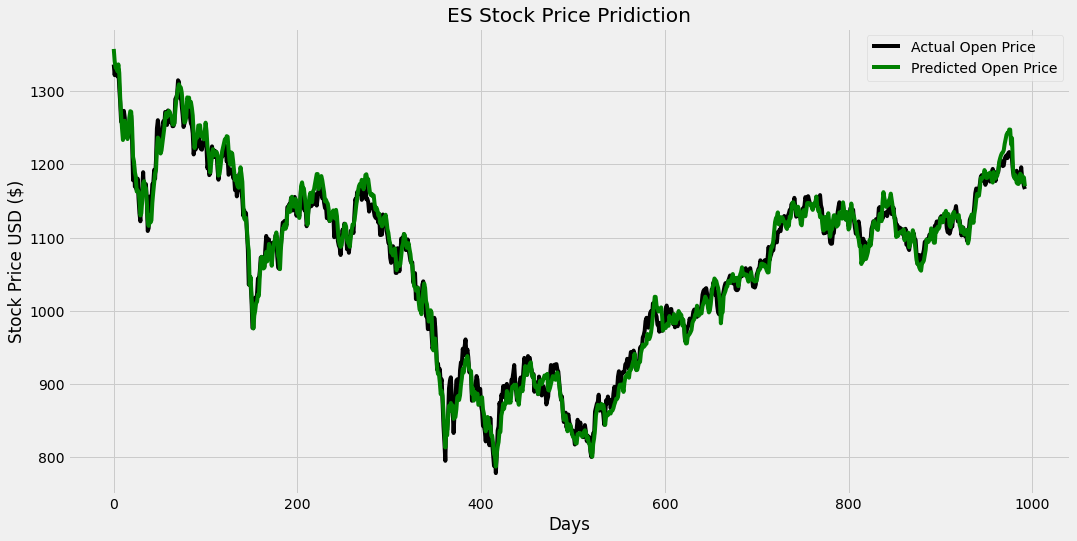

In [30]:
plt.figure(figsize=(16,8))
plt.plot(actual[:, 0], color='black', label='Actual Open Price')
plt.plot(pred_stock[:, 0], color='green', label='Predicted Open Price')
plt.title('ES Stock Price Pridiction')
plt.xlabel('Days')
plt.ylabel('Stock Price USD ($)')
plt.legend()
plt.show()

In [31]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_test, pred))

0.08281211183410005

In [32]:
math.sqrt(mean_squared_error(y_test, pred)) * 100

8.281211183410004

In [33]:
model.save("ES_stock_model2.h5")